# LogisticRegression 실습

# LogisticRegression 실습 05

## wave 데이터를 이용한 다중 분류

In [8]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import mglearn

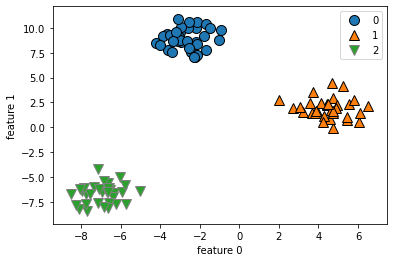

In [5]:
X, y = make_blobs(random_state=42)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend()
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

In [12]:
# 훈련셋 및 테스트셋 분리 및 LogisticRegression 실행

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = LogisticRegression(C=1, max_iter=10000)
model.fit(X_train, y_train)

(75, 2) (25, 2) (75,) (25,)


LogisticRegression(C=1, max_iter=10000)

In [15]:
# 예측하기
print(model.predict(X_test))

print(y_test)

[1 1 0 2 1 2 1 1 1 2 0 2 1 2 0 1 2 1 0 2 0 0 2 2 1]
[1 1 0 2 1 2 1 1 1 2 0 2 1 2 0 1 2 1 0 2 0 0 2 2 1]


In [16]:
# 평가하기
print(model.score(X_train, y_train))

print(model.score(X_test, y_test))

1.0
1.0


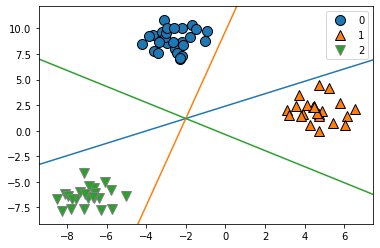

In [23]:
# 실행 결과 시각화
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

xx = np.linspace(-15, 15, 100)

for coef, intercept, color in zip(model.coef_, model.intercept_, mglearn.cm3.colors):
    yy = -(coef[0] * xx + intercept) / coef[1]

    plt.plot(xx, yy)

plt.legend()
plt.show()

# LogisticRegression 실습 06

## 붓꽃 데이터 셋을 이용한 다중 분류

In [31]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [32]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, 2:], iris.target, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(112, 2) (38, 2) (112,) (38,)


In [34]:
model = LogisticRegression(C=1, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000)

In [36]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9642857142857143, 0.9210526315789473)

In [37]:
model.coef_, model.intercept_

(array([[-2.56729731, -1.06520752],
        [ 0.08190737, -0.85223463],
        [ 2.48538994,  1.91744214]]),
 array([ 10.38536352,   3.09544466, -13.48080818]))

In [40]:
print(model.predict(X_test))

print(y_test)

[1 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0 2 1 0 0 1 1 2
 0]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0]


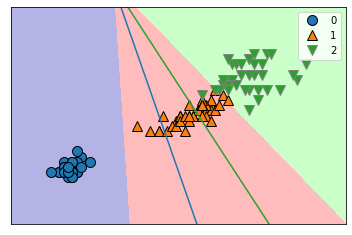

In [49]:
# 다중 분류
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

mglearn.plots.plot_2d_classification(model, X_train, alpha=0.3)

for coef, intercept, color in zip(model.coef_, model.intercept_, mglearn.cm3.colors):
    yy = -(coef[0] * xx + intercept) / coef[1]

    plt.plot(xx, yy)

plt.legend()
plt.show()

## LinearSVC 비교

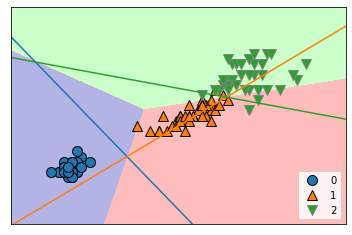

In [51]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

mglearn.plots.plot_2d_classification(model, X_train, alpha=0.3)

for coef, intercept, color in zip(model.coef_, model.intercept_, mglearn.cm3.colors):
    yy = -(coef[0] * xx + intercept) / coef[1]

    plt.plot(xx, yy)

plt.legend()
plt.show()

### 결정경계

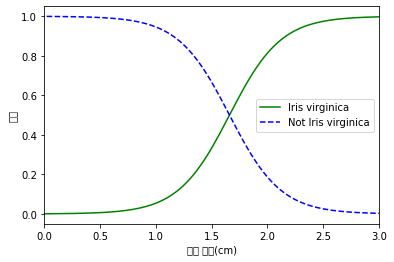

In [53]:
# 결정경계
# 꽃잎의 너비가 0~3cm 인 꽃에 대해 모델의 추정 확률을 계산
iris = load_iris()

X = iris.data[:, 3:]  # 꽃잎의 너비
y = (iris.target == 2).astype(np.int)

model = LogisticRegression().fit(X, y)

xx = np.linspace(-15, 15, 1000).reshape(-1,1)
y_proba = model.predict_proba(xx)

plt.plot(xx, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(xx, y_proba[:,0], 'b--', label='Not Iris virginica')
plt.xlim(0, 3)
plt.legend()
plt.xlabel('꾳잎 너비(cm)')
plt.ylabel('확률')
plt.show()

### Logistic Regression 특징

- C 값에 의해 규제 (L1, L2 모두 사용)

- 학습속도가 빠르고 예측도 빠름

- 매우 큰 데이터셋과 희소한 데이터 셋에도 잘 동작함 (solver='sag')

### 소프트맥스

- 다항 로지스틱스

$$
{ y }_{ k }=\frac { exp({ a }_{ k }) }{ \sum _{ i=1 }^{ n }{ exp({ a }_{ i }) }  }
$$

In [55]:
a = np.array([0.3, 2.9, 4.0]) # 지수함수
exp_a = np.exp(a) 
print(exp_a)

sum_exp_a = np.sum(exp_a)     # 지수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a         # 확률
print(y)

print( np.sum(y) )

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
1.0
